In [3]:
import os
from pathlib import Path
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# **European Soccer Dataset**

In [26]:
cx = sqlite3.connect("../data/database.sqlite")

cs = cx.cursor()

countries = pd.read_sql_query("SELECT * FROM COUNTRY", con=cx)
matches = pd.read_sql_query("SELECT * FROM MATCH", con=cx)
players = pd.read_sql_query("SELECT * FROM PLAYER", con=cx)
teams = pd.read_sql_query("SELECT * FROM TEAM", con=cx)

query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(query, con=cx)

print("Tables in database:")
print(tables)

Tables in database:
                name
0    sqlite_sequence
1  Player_Attributes
2             Player
3              Match
4             League
5            Country
6               Team
7    Team_Attributes


In [27]:
teams.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [28]:
players.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [29]:
print("columns of matches table:", " | ".join(matches.columns))
matches.head()


columns of matches table: id | country_id | league_id | season | stage | date | match_api_id | home_team_api_id | away_team_api_id | home_team_goal | away_team_goal | home_player_X1 | home_player_X2 | home_player_X3 | home_player_X4 | home_player_X5 | home_player_X6 | home_player_X7 | home_player_X8 | home_player_X9 | home_player_X10 | home_player_X11 | away_player_X1 | away_player_X2 | away_player_X3 | away_player_X4 | away_player_X5 | away_player_X6 | away_player_X7 | away_player_X8 | away_player_X9 | away_player_X10 | away_player_X11 | home_player_Y1 | home_player_Y2 | home_player_Y3 | home_player_Y4 | home_player_Y5 | home_player_Y6 | home_player_Y7 | home_player_Y8 | home_player_Y9 | home_player_Y10 | home_player_Y11 | away_player_Y1 | away_player_Y2 | away_player_Y3 | away_player_Y4 | away_player_Y5 | away_player_Y6 | away_player_Y7 | away_player_Y8 | away_player_Y9 | away_player_Y10 | away_player_Y11 | home_player_1 | home_player_2 | home_player_3 | home_player_4 | home_player_5

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


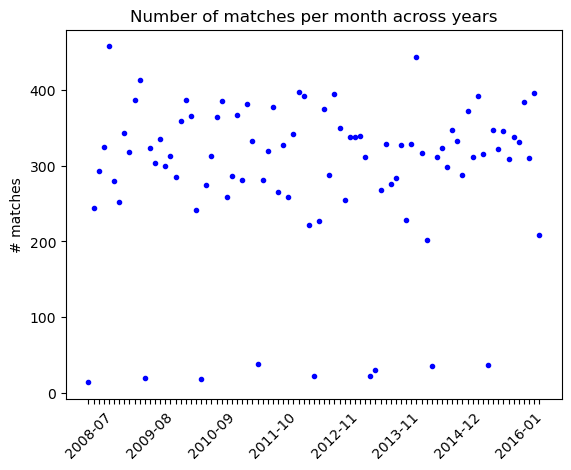

In [64]:
matches["date_month"] = matches["date"].apply(
    lambda x: "-".join(x.split("-")[:2]))
n_matches_per_month = matches.groupby("date_month").agg({"id": "size"})

# plt.xticks()
# plt.xticks(np.arange(9), list(range(2008, 2017)))
fig, ax = plt.subplots()
ax.scatter(n_matches_per_month.index,
           n_matches_per_month["id"], marker='.', c='b')
for (i, l) in enumerate(ax.xaxis.get_ticklabels()):
    if i % 12 != 0:
        l.set_visible(False)
    else:
        l.set(rotation=45)

ax.set_title("Number of matches per month across years")
ax.set_ylabel("# matches")
plt.savefig("../plots/n_matches_accross_years.png", bbox_inches="tight")

In [33]:
players_columns = [f"home_player_{i}" for i in range(1, 12)] + \
    [f"away_player_{i}" for i in range(1, 12)] + \
    [f"home_player_X{i}" for i in range(1, 12)] + \
    [f"away_player_X{i}" for i in range(1, 12)] + \
    [f"home_player_Y{i}" for i in range(1, 12)] + \
    [f"away_player_Y{i}" for i in range(1, 12)]
matches["all_players"] = matches[players_columns].apply(
    lambda row: set([int(v) for v in row if not np.isnan(v) and not v < 12]), axis=1)

matches["all_players"].sample(5)

25280    {33424, 120082, 25879, 181275, 176680, 26029, ...
24452    {37510, 179083, 96652, 638105, 213916, 484906,...
8884     {106369, 37381, 36878, 11027, 27284, 35988, 10...
17135    {178435, 69252, 68744, 69258, 69266, 116756, 1...
6488     {46468, 40709, 143752, 26376, 33420, 143757, 3...
Name: all_players, dtype: object

In [34]:
file_to_save = Path("../data/processed/number_of_matches_per_players.csv")
if os.path.exists(file_to_save):
    player_n_matches = pd.read_csv(file_to_save)
else:
    player_ids = []
    n_matches = []
    print("Counting number of matches per player([~2min])...")
    for i, p in tqdm(players.iterrows()):
        player_id = p["id"]
        m = matches["all_players"].apply(lambda se: player_id in se)
        player_ids.append(player_id)
        n_matches.append(matches[m].shape[0])
    print("OK")
    player_n_matches = pd.DataFrame({"id": player_ids, "n_matches": n_matches})
    player_n_matches = player_n_matches.join(players[["id", "player_name"]], rsuffix="_r") \
        .drop("id_r", axis=1) \
        .sort_values(by="n_matches", ascending=False)
    file_to_save.parent.mkdir(exist_ok=True, parents=True)
    player_n_matches.to_csv(file_to_save)
    print(f"Dataframe saved to {file_to_save} for further reuse.")


Counting number of matches per player([~2min])...


11060it [02:28, 74.57it/s]

OK
Dataframe saved to ..\data\processed\number_of_matches_per_players.csv for further reuse.


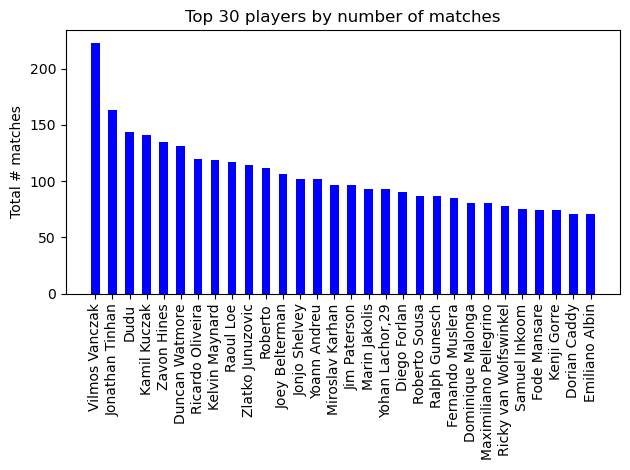

In [63]:
N = 30
fig, ax = plt.subplots()
ax.bar(x=player_n_matches.head(N).player_name, height=player_n_matches.head(N).n_matches, width=0.5, color='b')
ax.set_title(f"Top {N} players by number of matches")
ax.set_ylabel("Total # matches")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.tight_layout()
plt.savefig("../plots/number_of_matches_per_player.png", bbox_inches="tight")

# **Football transfers Dataset**

In [4]:
transfers =pd.read_csv("../data/transfers.csv")

transfers.head()

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000


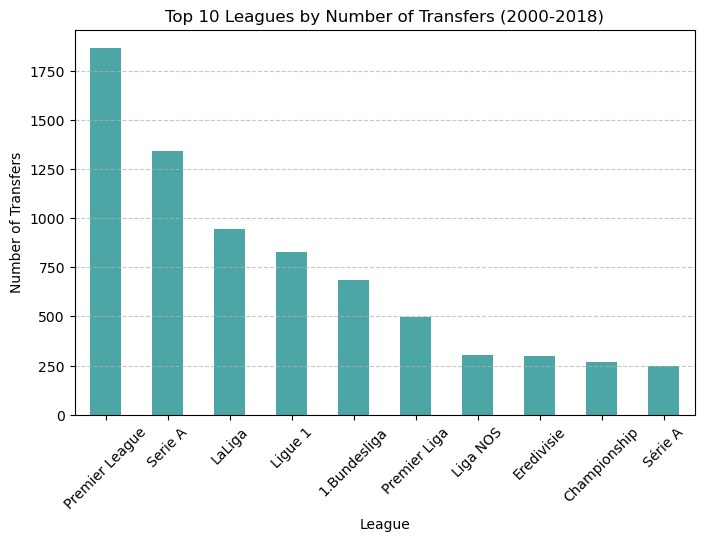

In [5]:
league_counts = pd.concat([transfers["League_from"], transfers["League_to"]]).value_counts()

# Plotting
plt.figure(figsize=(8, 5))
league_counts[:10].plot(kind="bar", color="teal", alpha=0.7)
plt.xlabel("League")
plt.ylabel("Number of Transfers")
plt.title("Top 10 Leagues by Number of Transfers (2000-2018)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig("../plots/top_leagues_by_transfers.png", bbox_inches="tight")
plt.show()

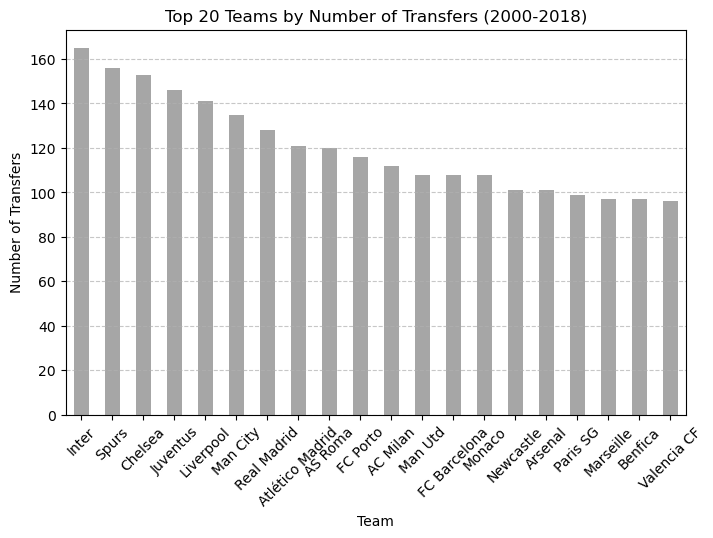

In [6]:
team_counts = pd.concat([transfers["Team_from"], transfers["Team_to"]]).value_counts()

# Plotting
plt.figure(figsize=(8, 5))
team_counts[:20].plot(kind="bar", color="gray", alpha=0.7)
plt.xlabel("Team")
plt.ylabel("Number of Transfers")
plt.title("Top 20 Teams by Number of Transfers (2000-2018)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig("../plots/top_teams_by_transfers.png", bbox_inches="tight")
plt.show()

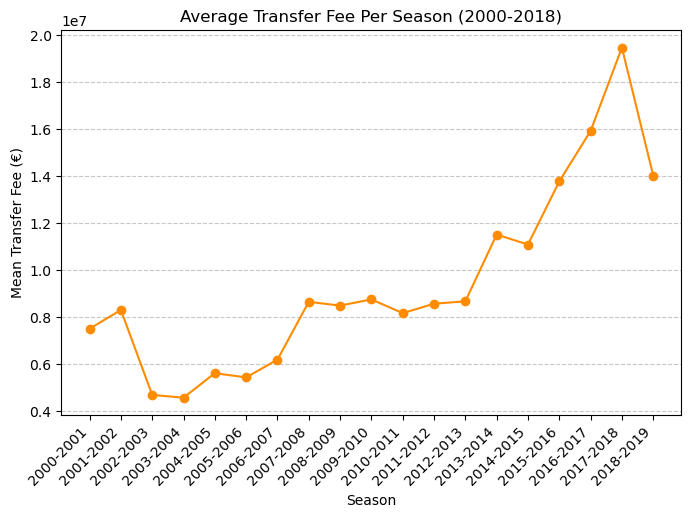

In [7]:
season_mean_transfer_fee = transfers.groupby("Season")["Transfer_fee"].mean()

plt.figure(figsize=(8, 5))
season_mean_transfer_fee.plot(marker="o", color="darkorange", linestyle="-")
plt.xticks(range(len(season_mean_transfer_fee.index)))  
plt.gca().set_xticklabels(season_mean_transfer_fee.index, rotation=45, ha="right") 
plt.xlabel("Season")
plt.ylabel("Mean Transfer Fee (€)")
plt.title("Average Transfer Fee Per Season (2000-2018)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig("../plots/transfer_fee_per_season.png", bbox_inches="tight")
plt.show()